### Install & import dependencies

In [1]:
%pip install ndlib --quiet
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
from custommodels.SpreadingModels import CascadeModel, ThresholdModel
from custommodels.Pickle import pickle, load
import random
import matplotlib.pyplot as plt
import numpy as np

### Load data

In [3]:
path = "../data/loc-brightkite_edges.txt.gz"
G = nx.read_edgelist(path, create_using=nx.Graph())
largest_cc = max(nx.connected_components(G), key=len)
len(largest_cc)
G = G.subgraph(largest_cc)

# Step 2. Make the disease spread on all four models

1. Adding the the code for the models (threshold and cascade) and the code to import the pickle with degree and betweeness


### Highest degree nodes:

In [4]:
sorted_degree_list = load("sorted_degree")

Found data, loading from picklejar


In [5]:
def top_degree_nodes_percent(percentage):
    top_degree_nodes = []
    n_selected = int(len(sorted_degree_list)*percentage)
    for b in sorted_degree_list[:n_selected]:

        top_degree_nodes.append(str(b[0]))
    return top_degree_nodes

def top_degree_nodes_n(n):
    top_degree_nodes = []
    for b in sorted_degree_list[:n]:
        top_degree_nodes.append(str(b[0]))
    return top_degree_nodes

### Highest betweeness centrality nodes:

In [6]:
betweenness = (load("betweenness_centrality"))
betweenness = list(betweenness.items())
sorted_betweenness = sorted(betweenness, key=lambda x: x[1], reverse=True)


Found data, loading from picklejar


In [7]:
def top_betweenness_nodes_percent(percentage):
    top_betweenness_nodes = []
    n_selected = int(len(sorted_betweenness)*percentage)
    for b in sorted_betweenness[:n_selected]:

        top_betweenness_nodes.append(str(b[0]))
    return top_betweenness_nodes

def top_betweenness_nodes_n(n):
    top_betweenness_nodes = []
    for b in sorted_betweenness[:n]:

        top_betweenness_nodes.append(str(b[0]))
    return top_betweenness_nodes

In [8]:
def random_nodes_percent(percentage):
    random_nodes = []
    nodes = list(G.nodes()).copy()
    n_selected = int(len(nodes)*percentage)
    for b in random.sample(nodes, n_selected):
        random_nodes.append(str(b))
    return random_nodes
def random_nodes_n(n):
    random_nodes = []
    nodes = list(G.nodes()).copy()
    for b in random.sample(nodes, n):
        random_nodes.append(str(b))
    return random_nodes

In [9]:
def n_to_percent(n):
    tot_nodes = len(G.nodes())
    return n/tot_nodes

In [10]:
def plot_resulst(results, num_initial_infected):
    final_sus = list(results[-1][0].values()).count(0)
    final_inf = list(results[-1][0].values()).count(1)
    final_rec = list(results[-1][0].values()).count(2)
    print(f"Final susceptible: {final_sus}")
    print(f"Final infected: {final_inf}")
    print(f"Final recovered: {final_rec}")
    # Plotting  the graph
    num_susceptible = [len(G.nodes) - num_initial_infected]
    num_infected = [num_initial_infected]
    num_recovered = [0]
    for state, i, r in results:
        num_susceptible.append(list(state.values()).count(0))
        num_infected.append(list(state.values()).count(1))
        num_recovered.append(list(state.values()).count(2))

    num_susceptible = np.array(num_susceptible)
    num_infected = np.array(num_infected)
    num_recovered = np.array(num_recovered)

    # get proportion
    prop_susceptible = num_susceptible / len(G.nodes)
    prop_infected = num_infected / len(G.nodes)
    prop_recovered = num_recovered / len(G.nodes)

    plt.plot(prop_susceptible, label="Susceptible", color="blue")
    plt.plot(prop_infected, label="Infected", color="red")
    plt.plot(prop_recovered, label="Recovered", color="green")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Number of nodes")
    plt.show()

## Cascade model infecting top X highest degree nodes 

Final susceptible: 255
Final infected: 6218
Final recovered: 50266


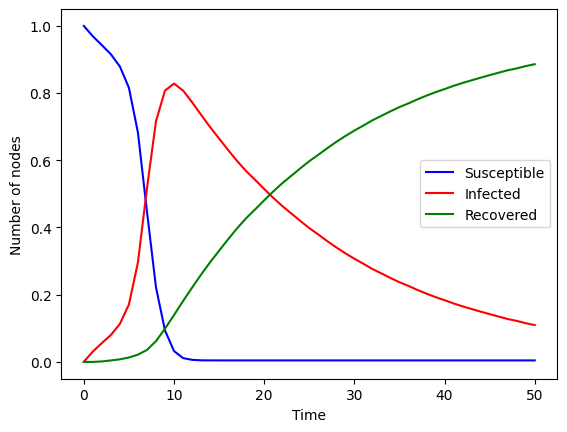

In [11]:
model = CascadeModel(G)
beta, gamma = 0.15, 0.05
model.set_parameters(beta, gamma)

n = 10
p = 0.1
initial_infected = top_degree_nodes_n(n)

model.set_initial_infected(initial_infected)
results = model.iterate(50)
# Print end result
plot_resulst(results, len(initial_infected))

## Threshold model infecting top X highest degree nodes 

Final susceptible: 50194
Final infected: 1254
Final recovered: 5291


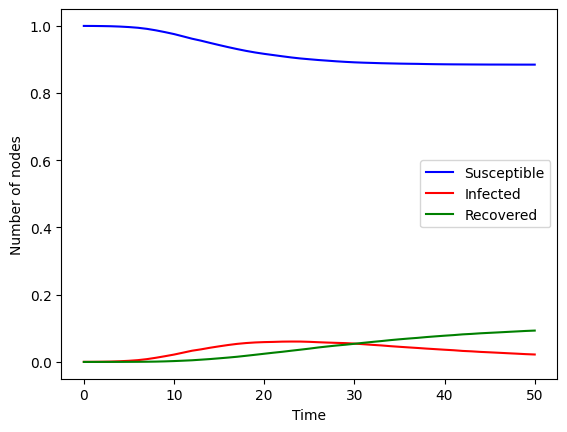

In [13]:
model = ThresholdModel(G)
theta, beta, gamma = 5, 0.15, 0.05
model.set_parameters(theta, beta, gamma)

n = 10
p = 0.1
initial_infected = top_degree_nodes_n(n)

model.set_initial_infected(initial_infected)
results = model.iterate(50)
# Print end result
plot_resulst(results, len(initial_infected))

## Cascade model with top 10% highest betweeness centrality nodes

In [12]:
cascade_degree = CascadeModel(G)
beta, gamma = 0.21204, 0.1
cascade_degree.set_parameters(beta, gamma)
# Get random 1% of nodes as initial infected
percentage = 0.05
initial_infected = top_betweenness_nodes
cascade_degree.set_initial_infected(initial_infected)
results = cascade_degree.iterate(40)

# Info
# Number at final step
final_sus = list(results[-1][0].values()).count(0)
final_inf = list(results[-1][0].values()).count(1)
final_rec = list(results[-1][0].values()).count(2)
print(f"Final susceptible: {final_sus}")
print(f"Final infected: {final_inf}")
print(f"Final recovered: {final_rec}")

NameError: name 'top_betweenness_nodes' is not defined

In [ ]:
# Plotting  the graph
num_susceptible = [len(G.nodes) - len(initial_infected)]
num_infected = [len(initial_infected)]
num_recovered = [0]
for state, i, r in results:
    num_susceptible.append(list(state.values()).count(0))
    num_infected.append(list(state.values()).count(1))
    num_recovered.append(list(state.values()).count(2))

num_susceptible = np.array(num_susceptible)
num_infected = np.array(num_infected)
num_recovered = np.array(num_recovered)
# print(num_susceptible, num_infected, num_recovered)

# get proportion
prop_susceptible = num_susceptible / len(G.nodes)
prop_infected = num_infected / len(G.nodes)
prop_recovered = num_recovered / len(G.nodes)

plt.plot(prop_susceptible, label="Susceptible", color="blue")
plt.plot(prop_infected, label="Infected", color="red")
plt.plot(prop_recovered, label="Recovered", color="green")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Number of nodes")
plt.show()

## Threshold model with top 10% highest betweeness centrality nodes

In [ ]:
model = ThresholdModel(G)
theta, gamma = 0.21204, 0.1
model.set_parameters(theta, gamma)
# Initial infected
percentage = 0.01
initial_infected = top_betweenness_nodes
model.set_initial_infected(initial_infected)
results = model.iterate(40)

# Info
# Number at final step
final_sus = list(results[-1][0].values()).count(0)
final_inf = list(results[-1][0].values()).count(1)
final_rec = list(results[-1][0].values()).count(2)
print(f"Final susceptible: {final_sus}")
print(f"Final infected: {final_inf}")
print(f"Final recovered: {final_rec}")

In [ ]:
# Plotting  the graph
num_susceptible = [len(G.nodes) - len(initial_infected)]
num_infected = [len(initial_infected)]
num_recovered = [0]
for state, i, r in results:
    num_susceptible.append(list(state.values()).count(0))
    num_infected.append(list(state.values()).count(1))
    num_recovered.append(list(state.values()).count(2))

num_susceptible = np.array(num_susceptible)
num_infected = np.array(num_infected)
num_recovered = np.array(num_recovered)
# print(num_susceptible, num_infected, num_recovered)

# get proportion
prop_susceptible = num_susceptible / len(G.nodes)
prop_infected = num_infected / len(G.nodes)
prop_recovered = num_recovered / len(G.nodes)

plt.plot(prop_susceptible, label="Susceptible", color="blue")
plt.plot(prop_infected, label="Infected", color="red")
plt.plot(prop_recovered, label="Recovered", color="green")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Number of nodes")
plt.show()